# Adam 
Presented during ML reading group, 2019-11-19.

Author: Olteanu Mihaela, olteanu.miha@gmail.com

The [Adam paper](https://arxiv.org/pdf/1412.6980) 

The Adam method combines the advantages of two other methods: AdaGrad (Duchi et al., 2011) and RMSProp (Tieleman & Hinton, 2012):
- it works well with sparse gradients (AdaGrad)
- it works well with on-line and non-stationary settings (RMSProp)

The Adam method computes the adaptive learning rates from estimates of first and second moments of gradients. The first and second moments of gradients are estimated using exponentially moving averages with hyper-parameters $\beta_{1}, \beta_{2} \in [0, 1)$ decay rates of these moving averages.

The advantages of the Adam method are:
- the magnitudes of parameter updates are invariant to rescaling of the gradient
- its stepsize are approximately bounded by the stepsize hyperparameter
- it does not require a stationary objective
- it works with sparse gradients
- it naturally performs a form of stepsize annealing








## The algorithm

***

**Algorithm 1:** 

$g_{t}^2$  indicates the elementwise square of $g_{t}$

Good default settings for the tested machine learning problems are $\alpha = 0.001$, $\beta_{1} = 0.9$, $\beta_{2} = 0.999$ and $\epsilon = 10^{-8} $

All operations on vectors are element-wise.
With $ \beta_{1}^t$ and $\beta_{2}^t$ we denote $\beta_{1}$ and $\beta_{2}$ to the power $t$

***
**Require:** $\alpha$ Stepsize  
**Require:** $\beta_{1}, \beta_{2} \in [0, 1)$ : Exponential decay rates for the moment estimates  
**Require** $f(\theta)$ : Stochastic objective function with parameters $\theta$  
**Require** $\theta_0$ : Initial parameter vector  
$\;\;\;\;$ $m_{0}  \leftarrow 0$ (Initialize 1st moment vector)  
$\;\;\;\;$ $v_{0}  \leftarrow 0$ (Initialize 2nd moment vector)  
$\;\;\;\;$ $t  \leftarrow 0$ (Initialize timestep)  
$\;\;\;\;$ **while** $\theta_{t}$ not converged **do**:  
$\;\;\;\;\;\;\;\;$ $t \leftarrow t+1$  
$\;\;\;\;\;\;\;\;$ $g_{t} \leftarrow \nabla(f(\theta_{t-1}))$ (Get gradients w.r.t. stochastic objective at timestep $t$)  
$\;\;\;\;\;\;\;\;$ $m_{t} \leftarrow \beta_{1} \cdot m_{t-1}+(1-\beta_{1}) \cdot g_{t}$  (Update biased first moment estimate)  
$\;\;\;\;\;\;\;\;$ $v_{t} \leftarrow \beta_{2} \cdot v_{t-1}+(1-\beta_{2}) \cdot g_{t}^2$  (Update biased second raw moment estimate)  
$\;\;\;\;\;\;\;\;$ $\hat{m_{t}} \leftarrow \dfrac{m_{t}}{(1-\beta_{1}^t)}$  (Compute bias-corrected first moment estimate)  
$\;\;\;\;\;\;\;\;$ $\hat{v_{t}} \leftarrow \dfrac{v_{t}}{(1-\beta_{2}^t)} $  (Compute bias-corrected second raw moment estimate)  
$\;\;\;\;\;\;\;\;$ $\theta_{t} \leftarrow \theta_{t-1} - \dfrac{\alpha \cdot \hat{m_{t}}}{\sqrt{\hat{v_{t}}}+\varepsilon } $  (Update parameters)  
$\;\;\;\;$**end while**  
$\;\;\;\;$**return** $\theta_{t}$ (Resulting parameters)  
    
***
* Adam uses estimations of first and second moments of gradient to adapt the learning rate for each weight of the neural network.
* The algorithm updates exponential moving averages of the gradient ($m_{t}$) and the squared gradient
($v_{t}$) where the hyper-parameters $\beta_{1}, \beta_{2} \in [0, 1)$ control the exponential decay rates of these moving
averages. 
* The moving averages themselves are estimates of the 1st moment (the mean) and the 2nd raw moment (the uncentered variance) of the gradient. 
* However, these moving averages are initialized as (vectors of) 0’s, leading to moment estimates that are biased towards zero, especially during the initial timesteps, and especially when the decay rates are small (i.e. the $\beta_{s}$ are close to 1). The good news is that this initialization bias can be easily counteracted, resulting in bias-corrected estimates $\hat{m_{t}}$ and $\hat{v_{t}}$

* The efficiency of the algorithm 1 can be improved with the following rule:

    $ \alpha_{t} = \alpha \cdot \dfrac{\sqrt(1-\beta_{2}^t)} {1-\beta_{1}^t}$ and $\theta_{t} := \theta_{t-1} - \dfrac{\alpha_{t} \cdot m_{t}}{\sqrt{v_{t}}+\hat{\varepsilon }} $  
    
        
        

## The update rule

* Assuming $\varepsilon = 0$, the effective step taken in parameter space at timestep $t$ is $\Delta{t} = \alpha \cdot \dfrac{\hat{m_{t}}} {\hat{v_{t}}}$
* The effective step size has two bounds:
    * In the most severe case of sparsity: when a gradient has been zero at all timesteps except at the current timestep
        * $\mid \Delta{t} \mid \le \dfrac{\alpha \cdot (1-\beta_{1})}{\sqrt{1-\beta_{2}}}$, in the case $(1-\beta_{1}) \gt \sqrt{1-\beta_{2}}$
    * Otherwise
        * $\mid \Delta{t} \mid \le \alpha$
 
* In more common scenarios, we will have $\mid \dfrac{ \hat{m_{t}} } { \sqrt{\hat{v_{t}}} } \mid  \; \approx  1$ since  $\mid \dfrac{ E[g_{t}] } { E[g_{t}^2] } \mid \le 1$
* The effective magnitude of the steps taken in parameter space at each timestep are approximately bounded by the stepsize setting $\alpha$, i.e., $|\Delta{t}| \le \alpha$


* With a slight abuse of terminology, we will call the ratio $\dfrac{ \hat{m_{t}} } { \sqrt{\hat{v_{t}}} }$ the signal-to-noise ratio (SNR).
    * With a smaller SNR the effective stepsize $\Delta{t}$ will be closer to zero. This is a desirable property, since a smaller SNR means that there is greater uncertainty about whether the direction of $\hat{m_{t}}$ corresponds to the direction of the true gradient. For example, the SNR value typically becomes closer to 0 towards an optimum, leading to smaller effective steps in parameter space: a form of automatic annealing.
 
 
* The effective stepsize $\Delta{t}$ is also invariant to the scale of the gradients; rescaling the gradients $g$ with factor $c$ will scale $\hat{m_{t}}$ with a factor $c$ and $\hat{v_{t}}$ with a factor $c^2$, which cancel out: $ \dfrac{(c \cdot \hat{m_{t}})} {\sqrt{c^2 \cdot \hat{v_{t}}}} = \dfrac{\hat{m_{t}}}{\sqrt{\hat{v_{t}}}} $

## Initialization bias correction

Adam uses estimations of first and second moments of gradient to adapt the learning rate for each weight of the neural network. The algorithm updates exponential moving averages of the gradient ($m_{t}$) and the squared gradient
($v_{t}$) where the hyper-parameters $\beta_{1}, \beta_{2} \in [0, 1)$ control the exponential decay rates of these moving averages. The moving averages themselves are estimates of the 1st moment (the mean) and the 2nd raw moment (the uncentered variance) of the gradient.
Since $m_{t}$ and $v_{t}$ are the estimates of the first moment and the second moment of the gradient, respectively, and the first moment and second moment are the estimates used to adapt the learning rate for each weight of the neural network, we want to ensure that both sets of estimators estimate the same expected value, hence the following equalities must be true:

$$E[m_{t}] = E[g{t}]$$
$$E[v_{t}] = E[g{t}^2]$$

Expected values of the estimators should equal the parameter we're trying to estimate, as it happens. If these properties would held true, it means we have **unbiased estimators**.


Looking at some values of $m$:  
$m_{0} = 0$  
$m_{1} = \beta_{1} \cdot m_{0} + (1- \beta_{1}) \cdot g_{1} = (1- \beta_{1}) \cdot g_{1}$  
$m_{2} = \beta_{1} \cdot m_{1} + (1- \beta_{1}) \cdot g_{2} = \beta_{1} \cdot (1- \beta_{1}) \cdot g_{1} + (1- \beta_{1}) \cdot g_{2} $  
$m_{3} = \beta_{1} \cdot m_{2} + (1- \beta_{1}) \cdot g_{3} = \beta_{1} ^ 2 \cdot (1- \beta_{1}) \cdot g_{1} + \beta_{1} \cdot (1- \beta_{1}) \cdot g_{2} + (1- \beta_{1}) \cdot g_{3}$  

we can rewrite the formula for our moving average:

$$ m_{t} = (1-\beta_{1}) \cdot \sum_{i=0}^{t}{\beta_{1} ^ (t-i) \cdot g_{i} }$$

Now, we can take a look at the expected value of $m_{t}$, to see how it relates to the true first moment, so we can correct for the discrepancy of the two :

$$ E[m_{t}] = E[(1-\beta_{1}) \cdot \sum_{i=0}^{t}{\beta_{1} ^ (t-i) \cdot g_{i} }]$$  

$$ E[m_{t}] = E[g_{t}](1-\beta_{1}) \cdot \sum_{i=0}^{t}{\beta_{1} ^ (t-i) } + C$$

$$ E[m_{t}] = E[g_{t}](1-\beta_{1}^t)  + C$$

Since we have a biased estimator $E[m_{t}]$, we have to correct it, so that the expected value is the one we want. This step is usually referred to as bias correction. The final formulas for our estimator will be as follows:

$$ \hat{m_{t}} = \dfrac{m_{t}}{1-\beta_{1}^t}$$
$$ \hat{v_{t}} = \dfrac{v_{t}}{1-\beta_{2}^t}$$

## Example

In [27]:
#%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


print(f'Numpy version: {np.__version__}')

Numpy version: 1.16.5


### Generate data

In [28]:
from scipy.sparse import random #to generate sparse data

np.random.seed(10) # for reproducibility
m_data = 100
n_data = 4 #number of features of the data
_scales = np.array([1,10, 10,1 ]) # play with these... 

_parameters = np.array([3, 0.5, 1, 7])

def gen_data(m, n, scales, parameters, add_noise=True):
    # Adam as Adagrad is designed especially for sparse data.
    # produce: X, a 2d tensor with m lines and n columns
    # and X[:, k] uniformly distributed in [-scale_k, scale_k] with the first and the last column containing sparse data 
    #(approx 75% of the elements are 0)
    #
    # To generate a sparse data matrix with m rows and n columns
    # and random values use S = random(m, n, density=0.25).A, where density = density of the data. S will be the 
    # resulting matrix 
    # more information at https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.random.html
    #
    # To obtain X - generate a random matrix with X[:, k] uniformly distributed in [-scale_k, scale_k]
    # set X[:, 0] and X[:, -1] to 0 and add matrix S with the sparse data.
    #
    # let y be X@parameters.T + epsilon, with epsilon ~ N(0, 1); y is a vector with m elements
    # parameters - the ideal weights, used to produce output values y
    #
    X = np.random.rand(m,n) *2*scales - scales
    X[:, 0] = 0
    X[:, -1] = 0
    S = random(m, n, density=0.25).A
    X = X + S
    y = X@parameters.T + np.random.randn(m)
    y = np.reshape(y, (-1, 1))
    return X, y

In [29]:
X, y = gen_data(m_data, n_data, _scales, _parameters)
print(X)
print(y)

[[ 1.28428476e-01 -9.58496101e+00  3.03724491e+00  5.66402849e-01]
 [ 0.00000000e+00 -5.50406709e+00 -6.03874270e+00  0.00000000e+00]
 [ 0.00000000e+00 -8.23320372e+00  3.70719637e+00  0.00000000e+00]
 [ 0.00000000e+00  2.43845268e-01  6.25241923e+00  0.00000000e+00]
 [ 0.00000000e+00 -4.16247864e+00  8.35548245e+00  0.00000000e+00]
 [ 0.00000000e+00 -7.15659905e+00 -2.41271256e+00  0.00000000e+00]
 [ 0.00000000e+00 -8.76767173e-01  2.35533957e+00  0.00000000e+00]
 [ 0.00000000e+00  2.81450742e+00  6.92397429e+00  0.00000000e+00]
 [ 0.00000000e+00 -3.61527822e+00 -8.19081301e+00  0.00000000e+00]
 [ 0.00000000e+00  6.57362653e+00 -9.06207361e+00  0.00000000e+00]
 [ 0.00000000e+00  6.38573991e+00 -6.02104921e+00  0.00000000e+00]
 [ 8.70617442e-01  5.09295383e+00 -4.08076586e+00  0.00000000e+00]
 [ 0.00000000e+00 -6.69968205e+00 -1.60699768e+00  0.00000000e+00]
 [ 2.25025940e-01 -5.99602037e+00 -2.31771103e+00  0.00000000e+00]
 [ 0.00000000e+00 -8.73909058e-01  6.52245688e+00  0.00000000e

### Define error function, gradient, inference

In [30]:
def model_estimate(X, w):
    '''Computes the linear regression estimation on the dataset X, using coefficients w
    :param X: 2d tensor with m_data lines and n_data columns
    :param w: a 1d tensor with n_data coefficients (no intercept)
    :return: a 1d tensor with m_data elements y_hat = w @X.T
    '''
    w = w.reshape(-1, 1)
    y_hat = X@w
    return y_hat 

In [31]:
def J(X, y, w):
    """Computes the mean squared error of model. See the picture from last week's sheet.
    :param X: input values, of shape m_data x n_data
    :param y: ground truth, column vector with m_data values
    :param w: column with n_data coefficients for the linear form 
    :return: a scalar value >= 0
    :use the same formula as in the exercise from last week
    """
    w = w.reshape(-1, 1)
    expr = (X@w - y)
    err = np.asscalar(1.0/(2 * X.shape[0]) * expr.T @ expr)
    return err

In [32]:
def gradient(X, y, w):
    '''Commputes the gradients to be used for gradient descent. 
    :param X: 2d tensor with training data
    :param y: 1d tensor with y.shape[0] == W.shape[0]
    :param w: 1d tensor with current values of the coefficients
    :return: gradients to be used for gradient descent. 
    :use the same formula as in the exercise from last week
    '''
    n = len(y)
    w = w.reshape(-1, 1)
    grad = 1.0 / n * X.T @ (X@w - y)
    return grad## implement

### Momentum algorithm

In [33]:
#The function from last week for comparison
def gd_with_momentum(X, y, w_init, eta=1e-1, gamma = 0.9, thresh = 0.001):
    """Applies gradient descent with momentum coefficient
    :params: as in gd_no_momentum
    :param gamma: momentum coefficient
    :param thresh: the threshold for gradient norm (to stop iterations)
    :return: the list of succesive errors and the found w* vector 
    """
    w = w_init.reshape(-1, 1)
    w_err=[]
   
    delta = np.zeros_like(w)
    while True:
        grad = gradient(X, y, w)
        err = J(X, y, w)
        w_err.append(err)
        w_nou = w + gamma * delta - eta * grad
        delta = w_nou - w
        w = w_nou
       
        if np.linalg.norm(grad) < thresh :
            break;
    return w_err, w

In [34]:
w_init = np.array([0, 0, 0, 0])
errors_momentum, w_best = gd_with_momentum(X, y, w_init,0.0001, 0.9)

In [35]:
print(f'Momentum: How many iterations were made: {len(errors_momentum)}')

Momentum: How many iterations were made: 102146


In [36]:
w_best

array([[2.96488751],
       [0.48443821],
       [0.9629436 ],
       [7.32967655]])

Text(0.5, 1.0, 'Optimization with momentum')

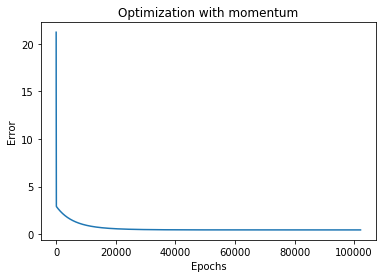

In [37]:
fig, axes = plt.subplots()
axes.plot(list(range(len(errors_momentum))), errors_momentum)
axes.set_xlabel('Epochs')
axes.set_ylabel('Error')
axes.set_title('Optimization with momentum')

### Apply AdaGrad and report resulting $\eta$'s

In [38]:
def ada_grad(X, y, w_init, eta_init=1e-1,  eps = 0.001, thresh = 0.001):
    '''Iterates with gradient descent. algorithm
    :param X: 2d tensor with data
    :param y: 1d tensor, ground truth 
    :param w_init: 1d tensor with the X.shape[1] initial coefficients
    :param eta_init: the initial learning rate hyperparameter
    :param eps: the epsilon value from the AdaGrad formula
    :param thresh: the threshold for gradient norm (to stop iterations)
    :return: the list of succesive errors w_err, the found w - the estimated feature vector 
    :and rates the learning rates after the final iteration 
    '''
     
    w = w_init.reshape(-1, 1)
    w_err=[]
   
    cum_sq_grad = np.zeros(w.shape)
    rates = np.zeros(w.shape)+eta_init
    while True:
        grad = gradient(X, y, w)      
        err = J(X, y, w)
        w_err.append(err)
        w = w - rates * grad
        cum_sq_grad += grad**2
        rates = eta_init/np.sqrt(eps+cum_sq_grad)
        
        if np.linalg.norm(grad) < thresh :
            break;
    return w_err, w, rates

In [39]:
w_init = np.array([0,0,0,0])
adaGerr, w_ada_best, rates = ada_grad(X, y, w_init)
print(rates)

[[0.01515786]
 [0.00157473]
 [0.00021369]
 [0.01046079]]


In [40]:
print(f'AdaGrad: How many iterations were made: {len(adaGerr)}')

AdaGrad: How many iterations were made: 9106


In [41]:
w_ada_best

array([[2.9633901 ],
       [0.48443559],
       [0.96293089],
       [7.32943788]])

Text(0.5, 1.0, 'Optimization with AdaGrad')

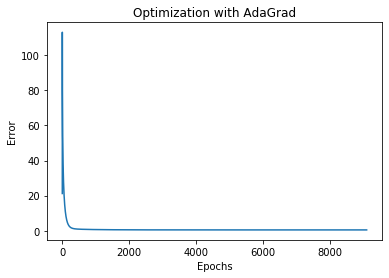

In [42]:
fig, axes = plt.subplots()
axes.plot(list(range(len(adaGerr))),adaGerr)
axes.set_xlabel('Epochs')
axes.set_ylabel('Error')
axes.set_title('Optimization with AdaGrad')

### Apply Adam and report resulting parameters

In [43]:
def adam(X, y, w_init, step_size = 0.001, beta_1=0.9, beta_2=0.999,  eps = 1e-8, thresh = 0.001):
    '''Iterates with gradient descent. algorithm
    :param X: 2d tensor with data
    :param y: 1d tensor, ground truth 
    :param w_init: 1d tensor with the X.shape[1] initial coefficients
    :param step_size: the step size hyperparameter
    :param beta_1: Exponential decay rate for the 1st moment estimate (mean)
    :param beta_1: Exponential decay rate for the 2nd moment estimate (uncentered variance)
    :param eps: the epsilon value from the Adam formula (avoid division by zero)
    :param thresh: the threshold for gradient norm (to stop iterations)
    :return: the list of succesive errors w_err, the found w - the estimated feature vector 
    :and rates the learning rates after the final iteration 
    '''
    w = w_init.reshape(-1, 1)
    w_err=[]
    t = 0
    m = np.zeros(w.shape)
    v = np.zeros(w.shape)
    while True:
        t += 1
        grad = gradient(X, y, w)      
        err = J(X, y, w)
        w_err.append(err)
        #Update biased first moment estimate
        #Update biased second raw moment estimate
        #Compute bias-corrected first moment estimate)
        #Compute bias-corrected second raw moment estimate)
        #Update parameters
        w = w + delta_w
        
        if np.linalg.norm(grad) < thresh :
            break;
    return w_err, w, delta_w

In [44]:
w_init = np.array([0,0,0,0])
adamErr, w_adam_best, delta_w = adam(X, y, w_init)
print(delta_w)

[[-7.04761038e-06]
 [ 1.25145312e-07]
 [-7.27710076e-09]
 [ 4.12973934e-05]]


In [45]:
print(f'Adam: How many iterations were made: {len(adamErr)}')

Adam: How many iterations were made: 11197


In [46]:
w_adam_best

array([[2.96173056],
       [0.4844352 ],
       [0.96291422],
       [7.32962175]])

Text(0.5, 1.0, 'Optimization with Adam')

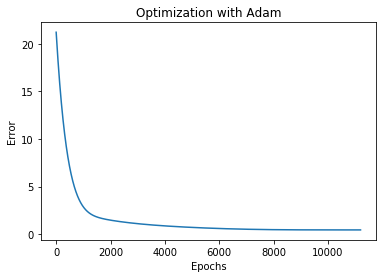

In [47]:
fig, axes = plt.subplots()
axes.plot(list(range(len(adamErr))),adamErr)
axes.set_xlabel('Epochs')
axes.set_ylabel('Error')
axes.set_title('Optimization with Adam')

## Adamax algorithm
***

**Algorithm 2:** AdaMax, a variant of Adam based on the infinity norm. 
Good default settings for the tested machine learning problems are $\alpha = 0.002, \beta_{1} = 0.9$  and  
$\beta_{2} = 0.999$. With $\beta_{1}^t$ we denote $\beta_{1}$ to the power $t$. Here, $(\dfrac{\alpha} {(1 - \beta_{1}^t)}
)$ is the learning rate with the bias-correction term for the first moment. All operations on vectors are element-wise.

***
**Require:** $\alpha$ Stepsize  
**Require:** $\beta_{1}, \beta_{2} \in [0, 1)$ : Exponential decay rates for the moment estimates  
**Require** $f(\theta)$ : Stochastic objective function with parameters $\theta$  
**Require** $\theta_0$ : Initial parameter vector  
$\;\;\;\;$ $m_{0}  \leftarrow 0$ (Initialize 1st moment vector)  
$\;\;\;\;$ $u_{0}  \leftarrow 0$ (Initialize the exponentially weighted infinity norm)  
$\;\;\;\;$ $t  \leftarrow 0$ (Initialize timestep)  
$\;\;\;\;$ **while** $\theta_{0}$ not converged **do**:  
$\;\;\;\;\;\;\;\;$ $t \leftarrow t+1$  
$\;\;\;\;\;\;\;\;$ $g_{t} \leftarrow \nabla(f_{t}(\theta_{t-1}))$ (Get gradients w.r.t. stochastic objective at timestep $t$)  
$\;\;\;\;\;\;\;\;$ $m_{t} \leftarrow \beta_{1} \cdot m_{t-1}+(1-\beta_{1}) \cdot g_{t}$  (Update biased first moment estimate)  
$\;\;\;\;\;\;\;\;$ $u_{t} \leftarrow max(\beta_{2} \cdot u_{t-1}, \mid g_{t} \mid )$  (Update the exponentially weighted infinity norm)   
$\;\;\;\;\;\;\;\;$ $\theta_{t} \leftarrow \theta_{t-1} - \dfrac{\alpha} {(1 - \beta_{1}^t)} \cdot \dfrac{m_{t}}{u_{t}} $  (Update parameters)  
$\;\;\;\;$**end while**  
$\;\;\;\;$**return** $\theta_{t}$ (Resulting parameters)  
    
***

### Apply Adamax and report resulting parameters

In [48]:
def adamax(X, y, w_init, step_size = 0.001, beta_1=0.9, beta_2=0.999,  eps = 1e-8, thresh = 0.001):
    '''Iterates with gradient descent. algorithm
    :param X: 2d tensor with data
    :param y: 1d tensor, ground truth 
    :param w_init: 1d tensor with the X.shape[1] initial coefficients
    :param step_size: the step size hyperparameter
    :param beta_1: Exponential decay rate for the 1st moment estimate (mean)
    :param beta_1: Exponential decay rate for the 2nd moment estimate (uncentered variance)
    :param eps: the epsilon value from the Adam formula (avoid division by zero)
    :param thresh: the threshold for gradient norm (to stop iterations)
    :return: the list of succesive errors w_err, the found w - the estimated feature vector 
    :and rates the learning rates after the final iteration 
    '''
    w = w_init.reshape(-1, 1)
    w_err=[]
    t = 0
    m = np.zeros_like(w)
    u = np.zeros_like(w)
    while True:
        t += 1
        grad = gradient(X, y, w)      
        err = J(X, y, w)
        w_err.append(err)
        #Update biased first moment estimate
        #Compute bias-corrected first moment estimate)
        #Update biased second raw moment estimate
        #Update parameters
        w = w + delta_w
        
        if np.linalg.norm(grad) < thresh :
            break;
    return w_err, w, delta_w

In [49]:
w_init = np.array([0,0,0,0])
adamaxErr, w_adamax_best, delta_w = adamax(X, y, w_init)
print(delta_w)

[[-1.42342929e-05]
 [ 2.63065640e-07]
 [-9.95276640e-09]
 [ 8.67333678e-05]]


In [50]:
print(f'AdaMax: How many iterations were made: {len(adamaxErr)}')

AdaMax: How many iterations were made: 7935


In [51]:
w_adamax_best

array([[2.96160818],
       [0.48443541],
       [0.9629132 ],
       [7.32970685]])

Text(0.5, 1.0, 'Optimization with Adamax')

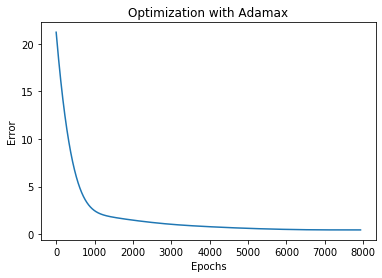

In [52]:
fig, axes = plt.subplots()
axes.plot(list(range(len(adamaxErr))),adamaxErr)
axes.set_xlabel('Epochs')
axes.set_ylabel('Error')
axes.set_title('Optimization with Adamax')

# Bibliography
* Diederik P. Kingma, Jimmy Lei Ba, [ADAM: A METHOD FOR STOCHASTIC OPTIMIZATION](https://arxiv.org/pdf/1412.6980)
* Sebastian Ruder, [An overview of gradient descent optimization algorithms](https://ruder.io/optimizing-gradient-descent/)
* Vitaly Bushaev, [Adam — latest trends in deep learning optimization](https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c)